In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\harim\Downloads\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


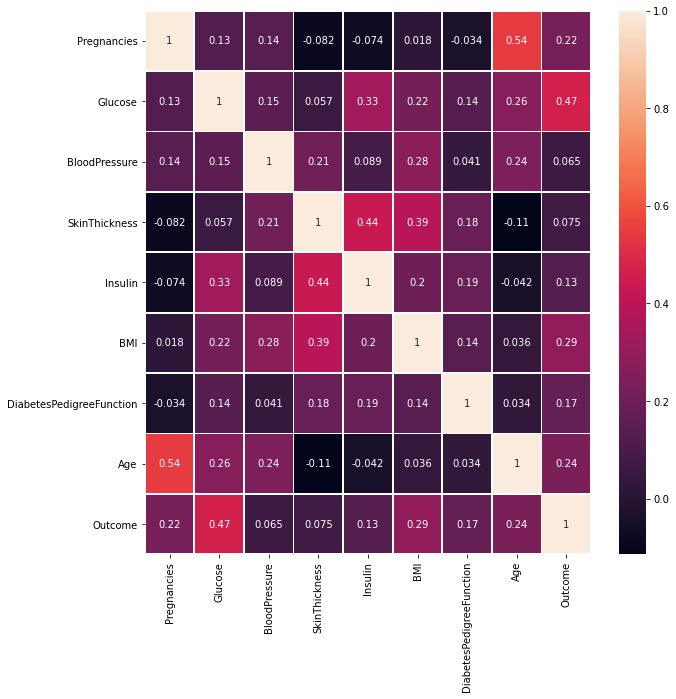

In [4]:
fig, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(df.corr(), annot=True, linewidths=1, ax=ax)

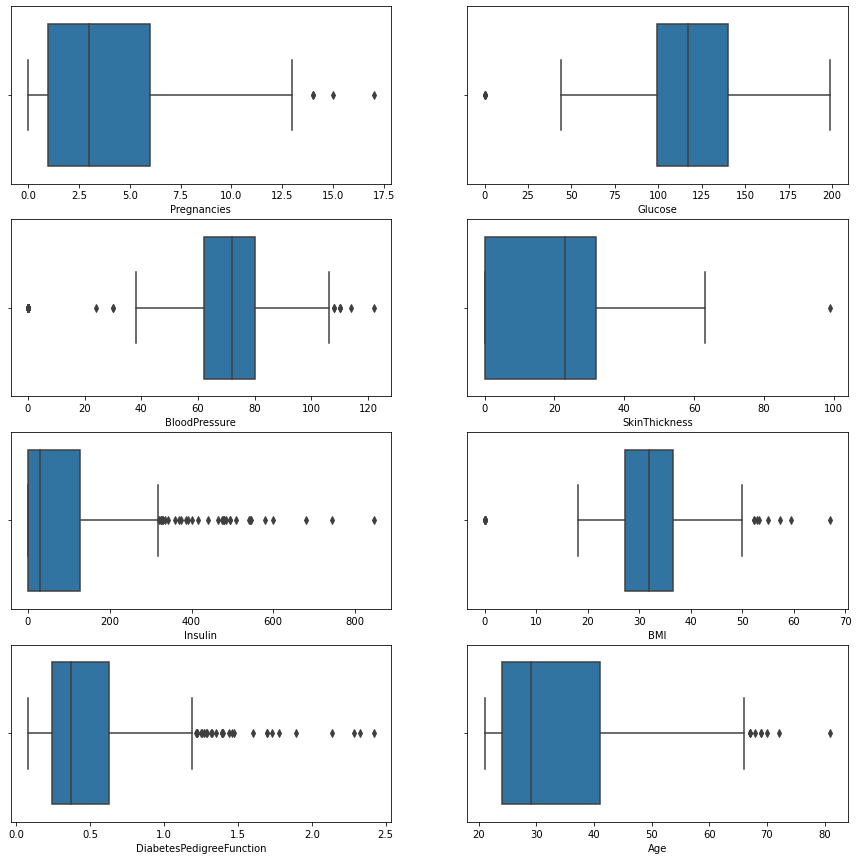

In [5]:
fig, axes = plt.subplots(4,2,figsize=(15,15))
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
axes=axes.ravel()
for i in range(len(columns)):
      sns.boxplot(ax=axes[i],x=df[columns[i]])

In [7]:
temp=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in temp:
  val=np.mean(df[i])

  df[i]=df[i].replace(0,val)


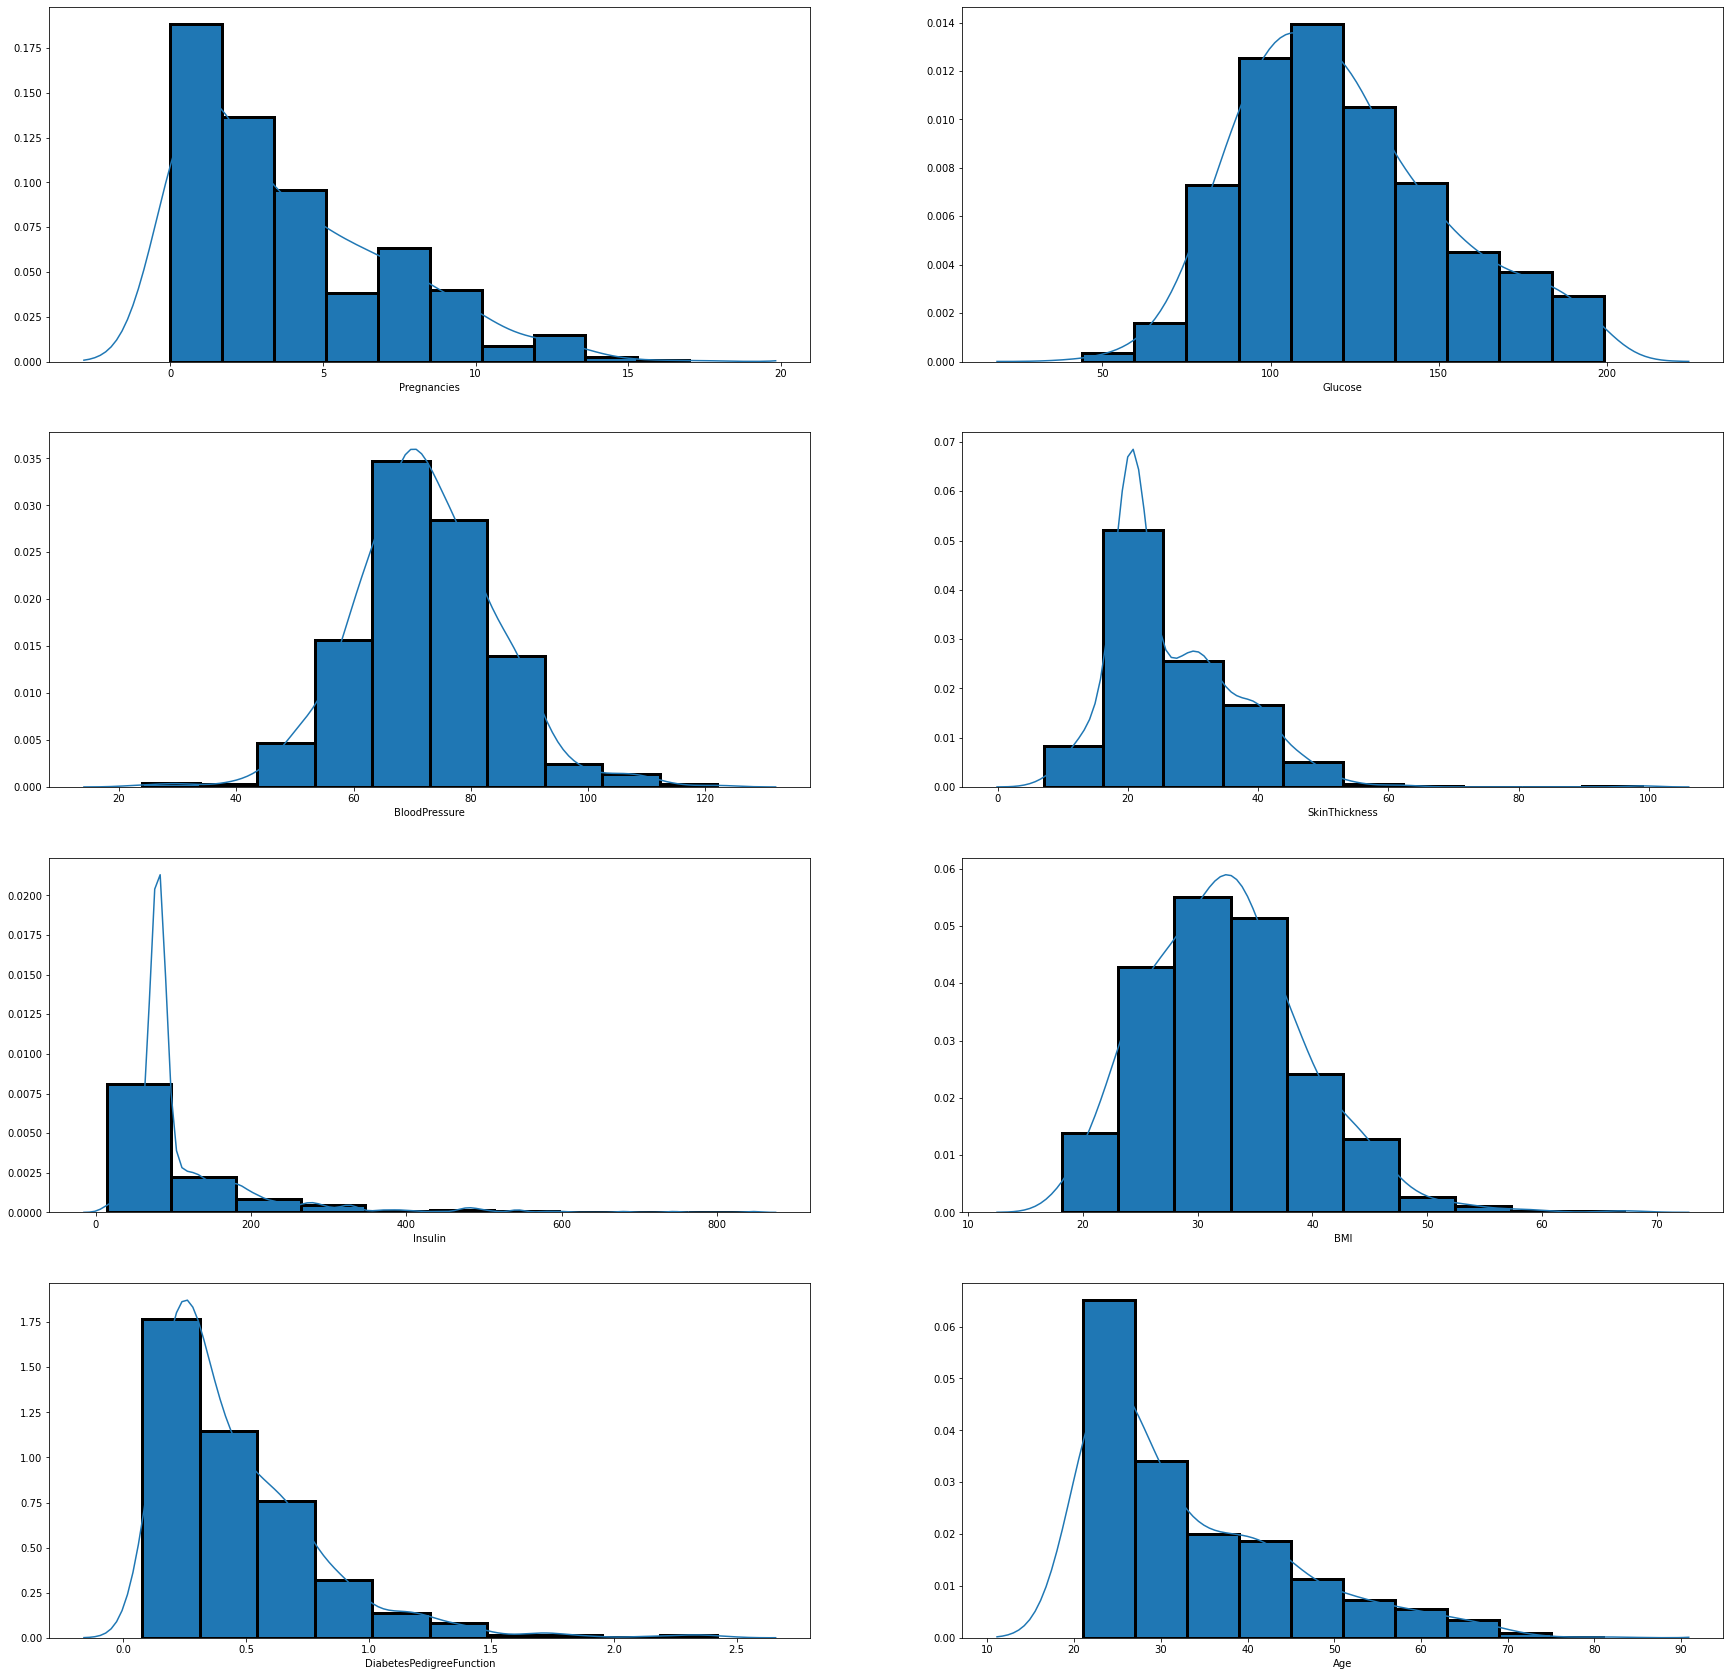

In [8]:
fig, axes = plt.subplots(4,2,figsize=(30,30))
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
axes=axes.ravel()
for i in range(len(columns)):
    sns.distplot(df[columns[i]],ax=axes[i],bins=10,hist_kws={ "linewidth": 3,
                            "alpha": 1, "edgecolor": "k"})

In [6]:
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
    
for i in columns:
  mini=df[i].quantile(0.1)
  maxi=df[i].quantile(0.9)
  df[i] = np.where(df[i] <mini, int(mini),df[i])
  df[i] = np.where(df[i] >maxi, int(maxi),df[i])



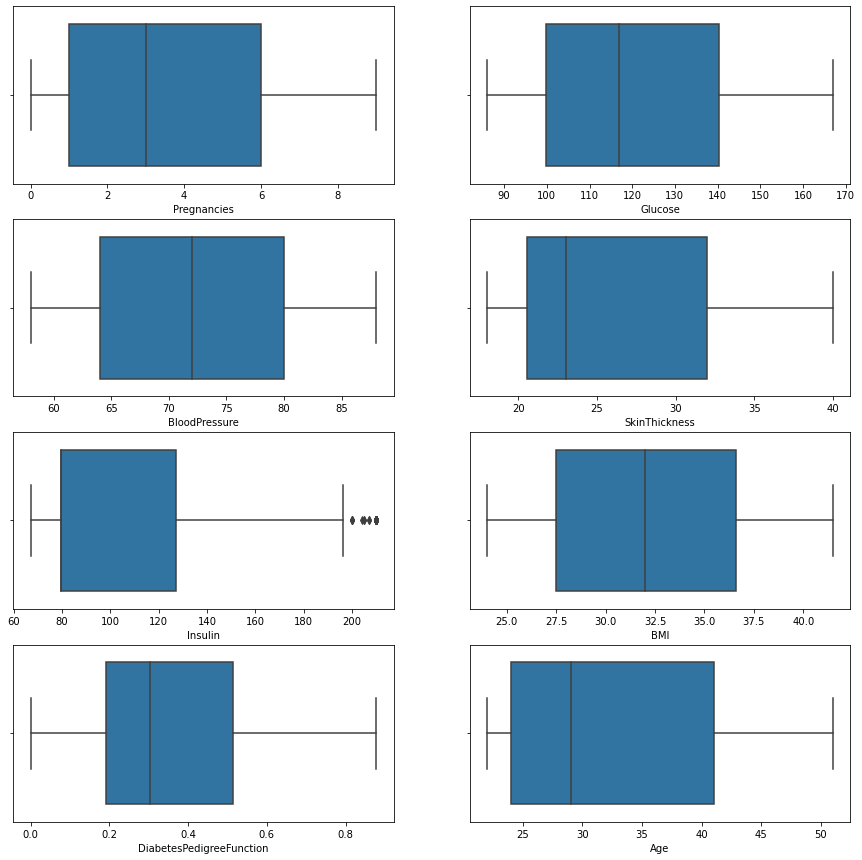

In [10]:
fig, axes = plt.subplots(4,2,figsize=(15,15))
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
axes=axes.ravel()
for i in range(len(columns)):
      sns.boxplot(ax=axes[i],x=df[columns[i]])

In [7]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
over = SMOTE()
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
steps = [('s',sc),('o', over)]
pipeline = Pipeline(steps=steps)

X_train,y_train=pipeline.fit_resample(X,y)

## Support Vector Machines


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
pred=svm.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

[[130  21]
 [ 35  45]]
0.7575757575757576


## Logistic Regression 

In [13]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

[[120  31]
 [ 33  47]]
0.7229437229437229


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
pred=rfc.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

[[117  34]
 [ 27  53]]
0.7359307359307359


## XGBoost

In [15]:
import xgboost as xgb1
xgb=xgb1.XGBClassifier()
xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

[19:12:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[117  34]
 [ 31  49]]
0.7186147186147186


## SVM with Grid Search